In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
# Replace 'ecommerce_furniture_dataset_2024.csv' with the correct file path if needed
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')





In [24]:
# Display the first few rows of the dataset
df.head()





,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [25]:
# Check for missing values in the dataset
df.isnull().sum()


productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [26]:
# Remove the dollar sign and convert the column to numeric
df['originalPrice'] = df['originalPrice'].replace({'\$': '', ',': ''}, regex=True).astype(float)



In [27]:
# Fill missing values in 'originalPrice' with the median value
df['originalPrice'].fillna(df['originalPrice'].median(), inplace=True)


In [28]:
# Verify if there are any missing values after filling
df.isnull().sum()


productTitle     0
originalPrice    0
price            0
sold             0
tagText          3
dtype: int64

In [29]:
# Fill missing values in 'tagText' with 'Unknown'
df['tagText'].fillna('Unknown', inplace=True)


In [30]:
# Drop rows with missing values in 'tagText'
df.dropna(subset=['tagText'], inplace=True)


In [31]:
# Verify if there are any missing values after filling or dropping
df.isnull().sum()


productTitle     0
originalPrice    0
price            0
sold             0
tagText          0
dtype: int64

In [32]:
# Get descriptive statistics for numerical columns
df[['originalPrice', 'price', 'sold']].describe()


,originalPrice,sold
count,2000.000000,2000.000000
mean,129.149355,23.493500
std,220.526269,254.094061
min,3.630000,0.000000
25%,88.310000,1.000000
50%,88.310000,3.000000
75%,88.310000,9.000000
max,3265.130000,10000.000000


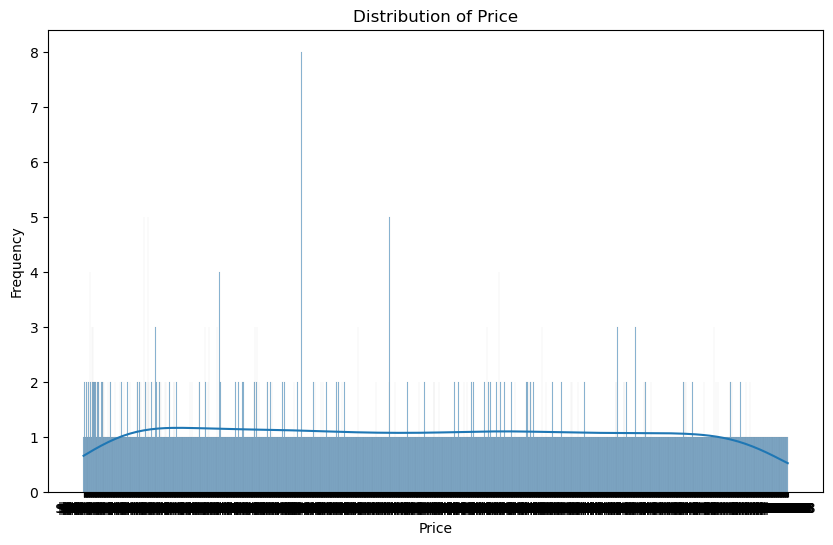

In [33]:
# Plotting the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


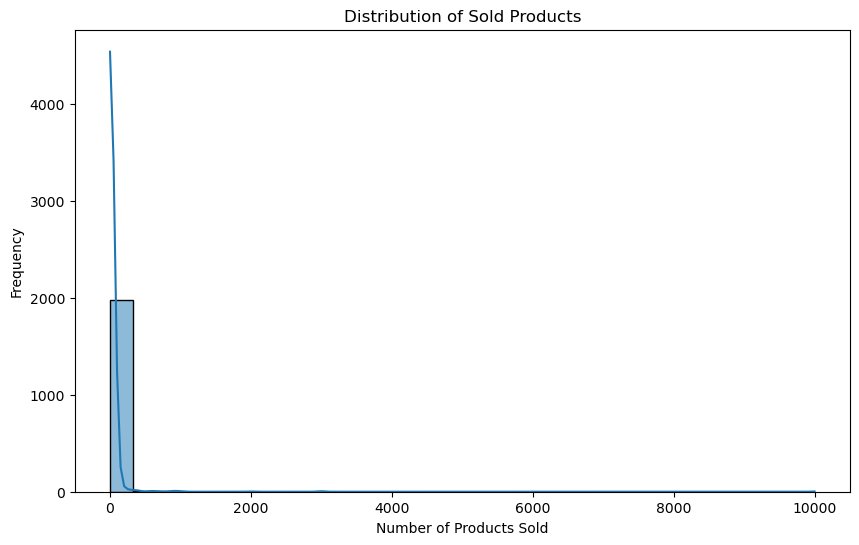

In [34]:
# Plotting the distribution of 'sold'
plt.figure(figsize=(10, 6))
sns.histplot(df['sold'], kde=True, bins=30)
plt.title('Distribution of Sold Products')
plt.xlabel('Number of Products Sold')
plt.ylabel('Frequency')
plt.show()


In [36]:
# Clean the 'originalPrice' column by removing dollar sign and commas, and convert to numeric
df['originalPrice'] = df['originalPrice'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Clean the 'price' column by removing dollar sign and commas, and convert to numeric
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)



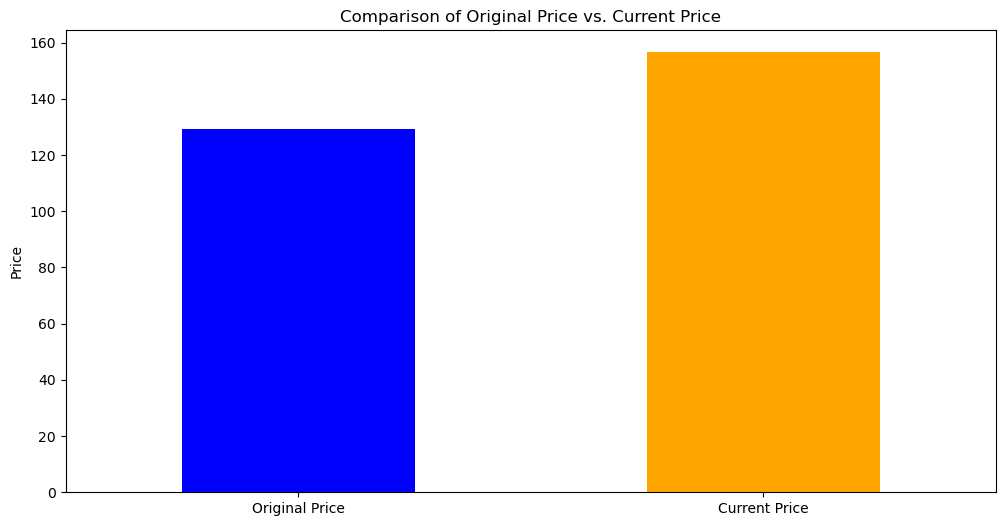

In [37]:
# Plotting a bar chart for 'originalPrice' and 'price'
plt.figure(figsize=(12, 6))
df[['originalPrice', 'price']].mean().plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparison of Original Price vs. Current Price')
plt.ylabel('Price')
plt.xticks([0, 1], ['Original Price', 'Current Price'], rotation=0)
plt.show()


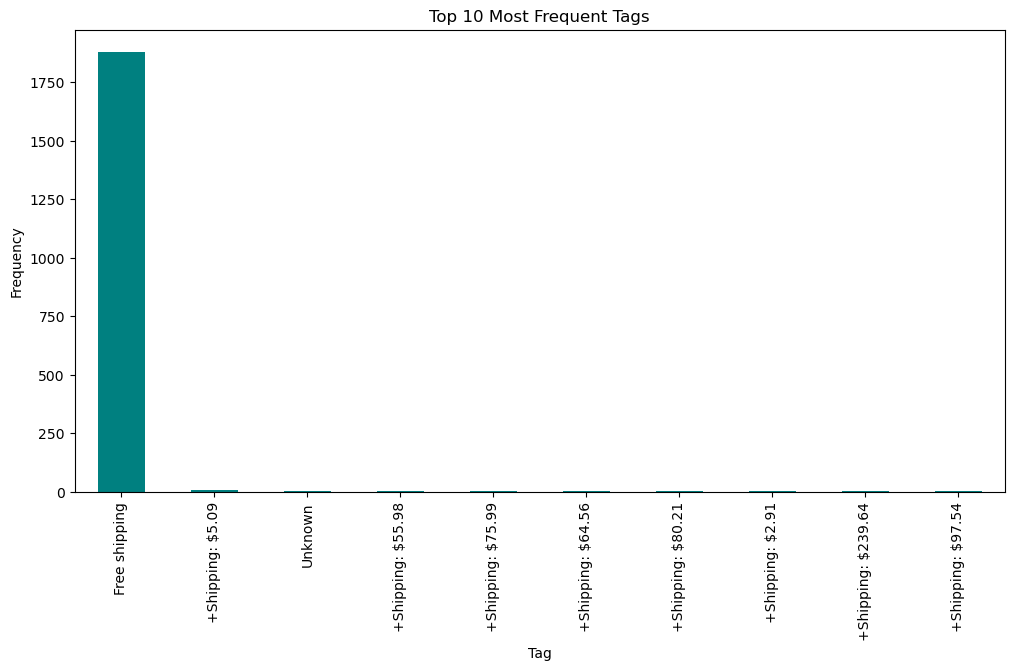

In [38]:
# Plotting the most frequent 'tagText' values
plt.figure(figsize=(12, 6))
tag_counts = df['tagText'].value_counts().head(10)
tag_counts.plot(kind='bar', color='teal')
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.show()


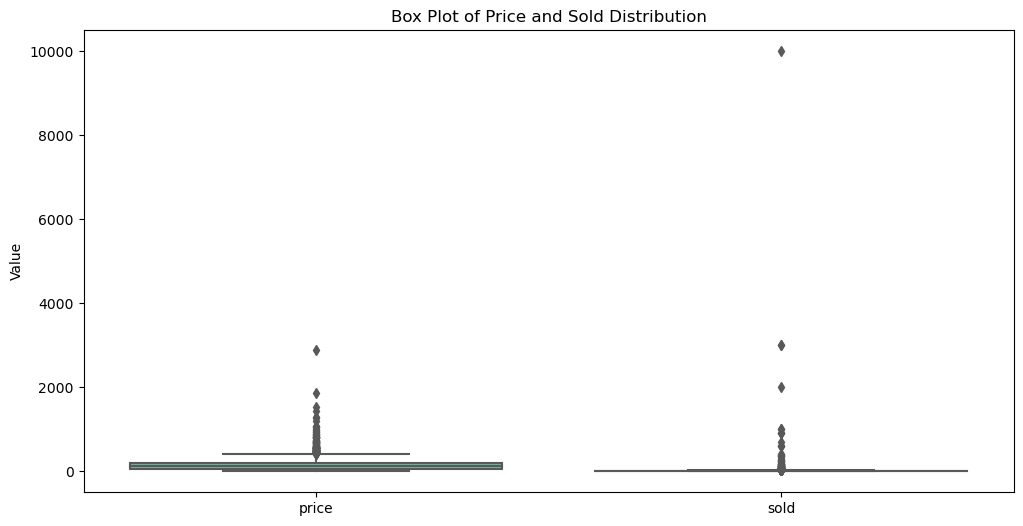

In [39]:
# Box plot for 'price' and 'sold'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['price', 'sold']], palette='Set2')
plt.title('Box Plot of Price and Sold Distribution')
plt.ylabel('Value')
plt.show()


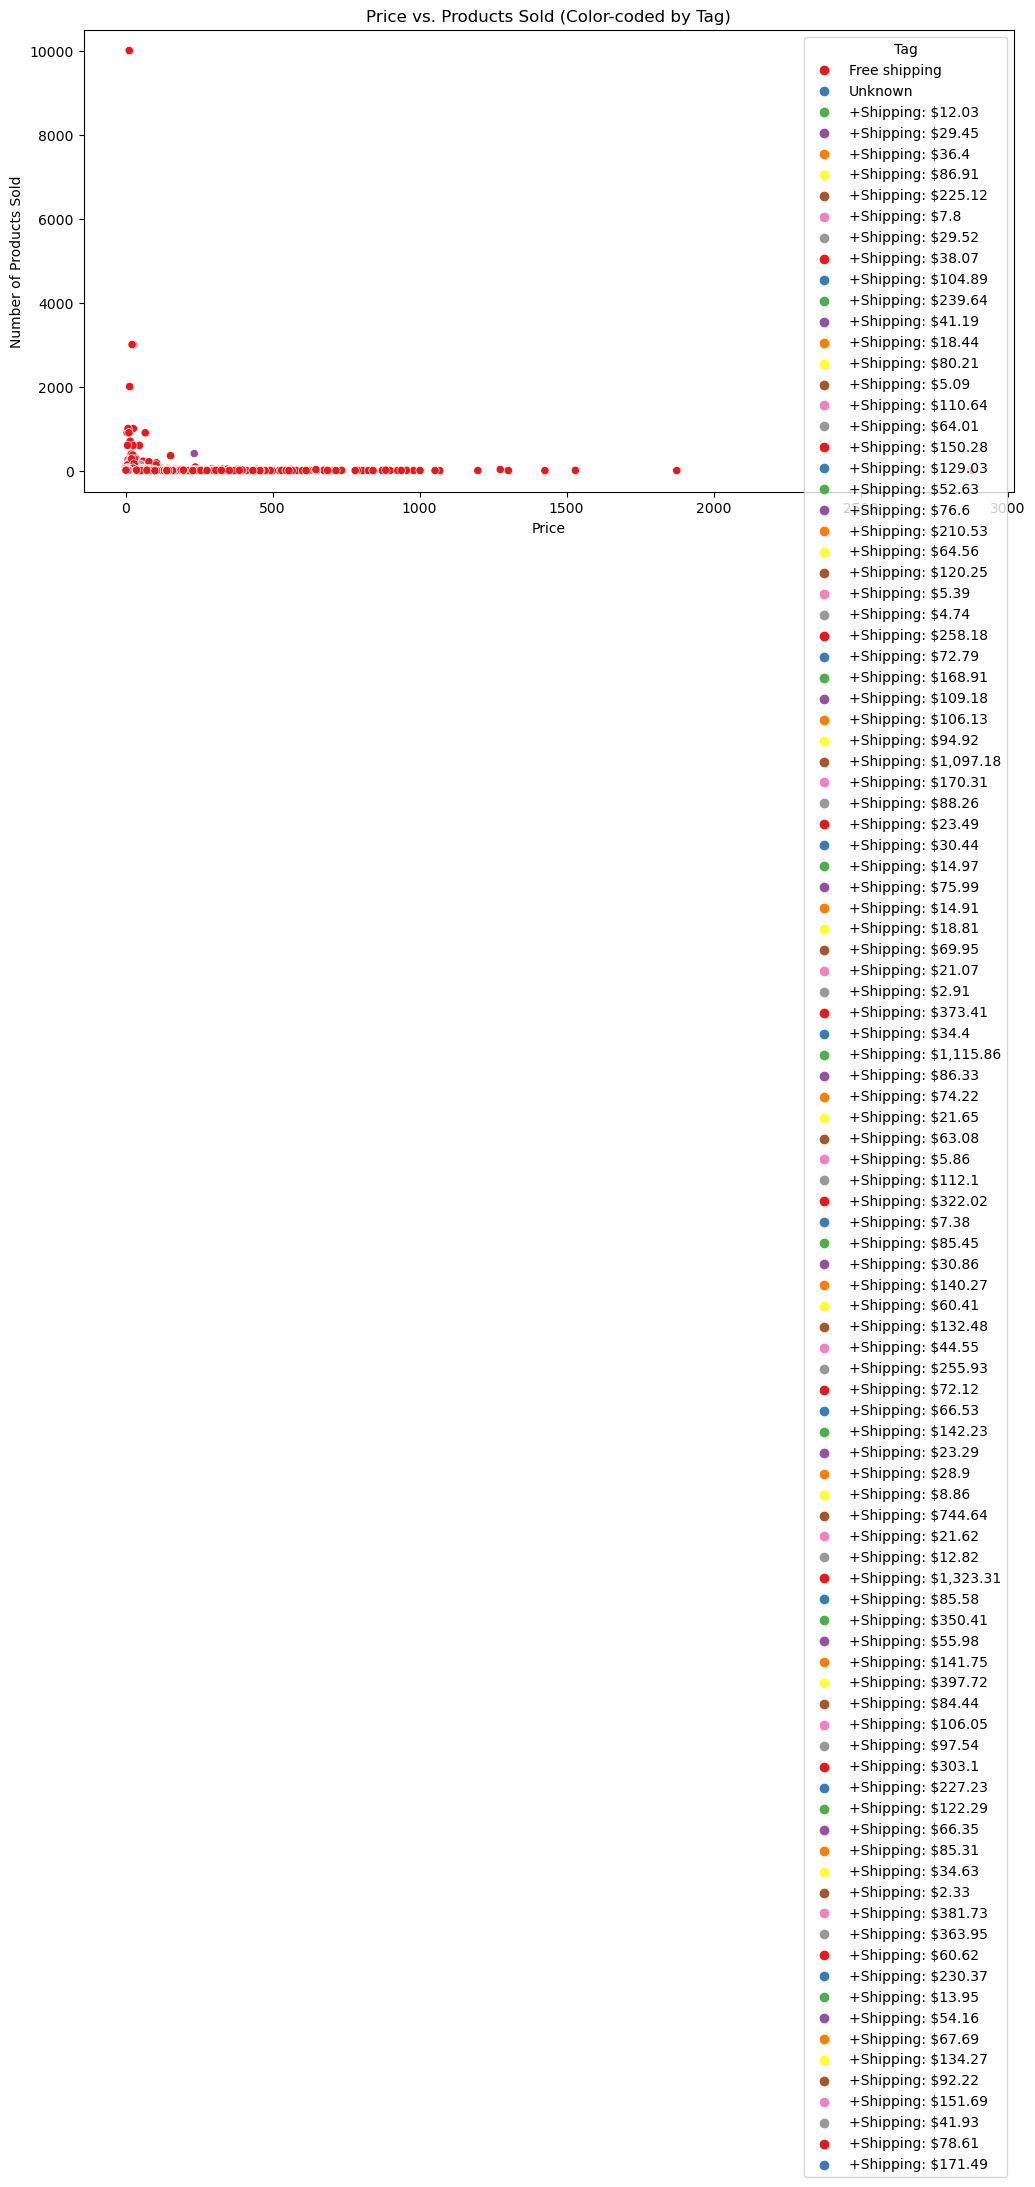

In [40]:
# Scatter plot for 'price' vs. 'sold', color-coded by 'tagText'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='sold', hue='tagText', data=df, palette='Set1', marker='o')
plt.title('Price vs. Products Sold (Color-coded by Tag)')
plt.xlabel('Price')
plt.ylabel('Number of Products Sold')
plt.legend(title='Tag')
plt.show()


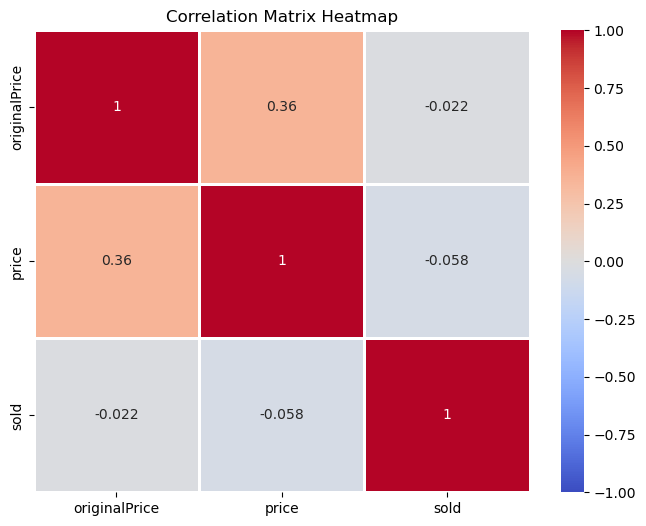

In [41]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df[['originalPrice', 'price', 'sold']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()
